# Сборный проект

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

**Этапы выполнения проекта**

* Откроем файл с данными и изучим общую информацию
* Подготовим данные
* Проведем исследовательский анализ данных
* Составим портрет пользователя каждого региона
* Проверим гипотезы
* Общий вывод

## Откроем файл с данными и изучим общую информацию.

In [1]:
#подгрузим библеотеки
from matplotlib import pyplot as plt
from math import factorial as fct
import numpy as np
from scipy.stats import norm
from scipy import stats as st
import pandas as pd
import seaborn as sns

In [2]:
#откроем файл
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Подготовим данные

**Заменим названия столбцов приведя их к нижнему регистру**

In [5]:
data.columns = map(str.lower, data.columns)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Удалим пустые значения в столбцах `name` и `year_of_release`. Их немного, менее 2%.

In [7]:
data = data.dropna(subset=['year_of_release', 'name'])

**Преобразуем данные в нужные типы.**

Поменяем тип `year_of_release` на int32.

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int32')

Преобразуем столбцы `na_sales`, `eu_sales`, `jp_sales`, `other_sales` и `critic_score` в float32 для экономии памяти.

In [9]:
data.loc[:, 'na_sales' : 'critic_score'] = data.loc[:, 'na_sales' : 'critic_score'].astype('float32')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float32(5), int32(1), object(5)
memory usage: 1.1+ MB


**Обработаем пропуски**

Рассмотрим данные в столбце `rating` и определим количество пропусков.

In [11]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Переименум рейтинг K-A в E, т.к. это было его первоничальное название.

In [12]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

Удалим редкие значения.

In [13]:
data = data.drop(data.query('rating == "EC" | rating == "AO" | rating == "RP"').index)

Заменим пропуски значением `No_rating`

In [14]:
data['rating'] = data['rating'].fillna('No_rating')

In [15]:
#посмотрим что получилось
data['rating'].value_counts()

No_rating    6676
E            3924
T            2905
M            1536
E10+         1393
Name: rating, dtype: int64

Пропуски здесь свяваны с отсутствием рейтинга от организации ESRB по этим играм. Сами как-то высчитать эти оценки мы не можем и поэтому оставим этоти пропуски без изменений.

Рассмотрим столбец `critic_score`. 

In [16]:
data['critic_score'].isna().sum()

8453

Здесь пропуски так же связаны с отсутствием оценок экспертов. Оставим их без изменений.

Рассмотрим столбец `user_score`. Посчитаем количество пустых значений и значений tbd (to be determined, то есть - будет определено).

In [17]:
nan = data['user_score'].isna().sum()
nan

6605

In [18]:
tbd = data[data['user_score'] == "tbd"]['user_score'].count()
tbd

2369

Заменим tbd на NaN.

In [19]:
data.loc[data['user_score'] == 'tbd', ['user_score']] = np.nan

Поменяем тип данных на float32

In [20]:
data['user_score'] = data['user_score'].astype('float32')

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [21]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посмотрим что получилось

In [22]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,No_rating,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,No_rating,31.380001
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.000000,0.01,0.00,NaN,NaN,No_rating,0.010000
16711,LMA Manager 2007,X360,2006,Sports,0.000000,0.010000,0.00,0.00,NaN,NaN,No_rating,0.010000
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.000000,0.01,0.00,NaN,NaN,No_rating,0.010000
16713,Spirits & Spells,GBA,2003,Platform,0.010000,0.000000,0.00,0.00,NaN,NaN,No_rating,0.010000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16434 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16434 non-null  object 
 1   platform         16434 non-null  object 
 2   year_of_release  16434 non-null  int32  
 3   genre            16434 non-null  object 
 4   na_sales         16434 non-null  float32
 5   eu_sales         16434 non-null  float32
 6   jp_sales         16434 non-null  float32
 7   other_sales      16434 non-null  float32
 8   critic_score     7981 non-null   float32
 9   user_score       7460 non-null   float32
 10  rating           16434 non-null  object 
 11  sales_total      16434 non-null  float32
dtypes: float32(7), int32(1), object(4)
memory usage: 1.1+ MB


## Проведем исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы**

Представим в виде графика

Text(0, 0.5, 'Количество')

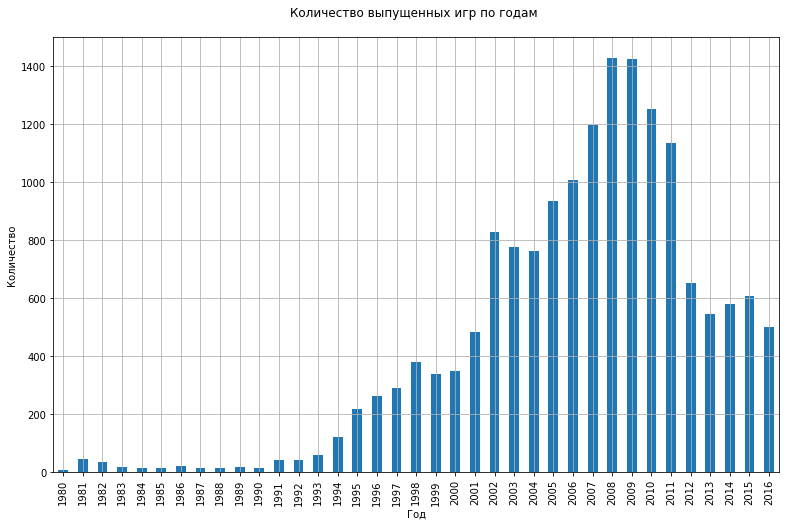

In [25]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(13,8), grid=True)
plt.title('Количество выпущенных игр по годам \n')
plt.xlabel('Год')
plt.ylabel('Количество')

Самыми результативными были годы с 2005 по 2011 годы.

Посмотрим, как менялись продажи по платформам. 

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [26]:
platform_top = data.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head(10).reset_index()
platform_top

,platform,sales_total
0,PS2,1233.319946
1,X360,961.239990
2,PS3,931.339966
3,Wii,890.520020
4,DS,802.130005
5,PS,727.580017
6,PS4,314.140015
7,GBA,312.880005
8,PSP,289.529999
9,3DS,257.809998


Text(0, 0.5, 'Количество копий, млн.')

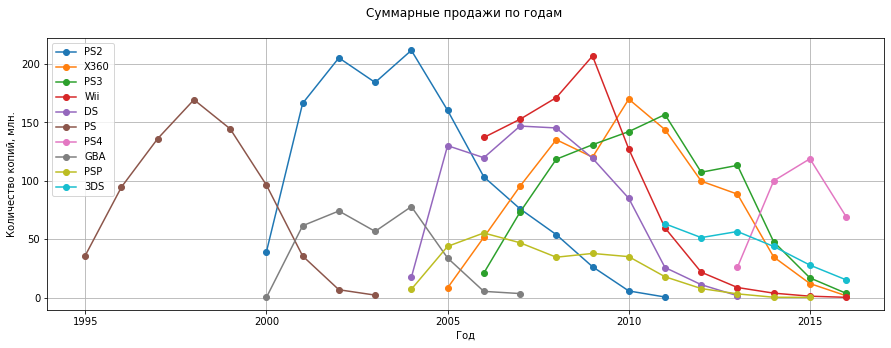

In [27]:
#сформируем список платформ
platform_top_name = platform_top['platform']

#организуем цикл и построим график
for i in range (len(platform_top_name)):
    platform_name = platform_top_name[i]
    (data.query('platform == @platform_name & year_of_release > 1994')
    .groupby('year_of_release')['sales_total']
    .sum().plot(figsize=(15,5), grid=True, style='o-'))
    
plt.legend(platform_top_name)
plt.title('Суммарные продажи по годам \n')
plt.xlabel('Год')
plt.ylabel('Количество копий, млн.')

Из графика видно, все платформы переживают взлеты и падения суммарных продаж. Срок жизни платформ примерно 10 лет. Наиболее результативными были года с 2007 по 2011. Потом суммарные продажи почти у всех платформ падают. Единственная платформа у которой растут суммарные продажи - PS4. Низкие цифры в 2016 году не показатель. 2016 год в датафрейме представлен не полностью.

Возьмем данные за последние 5 лет (половина периода жизни платформы) и посмотрим какие платформы лидируют по продажам, растут или падают.

Выберем несколько потенциально прибыльных платформ. Построим график.

Text(0, 0.5, 'Количество копий, млн.')

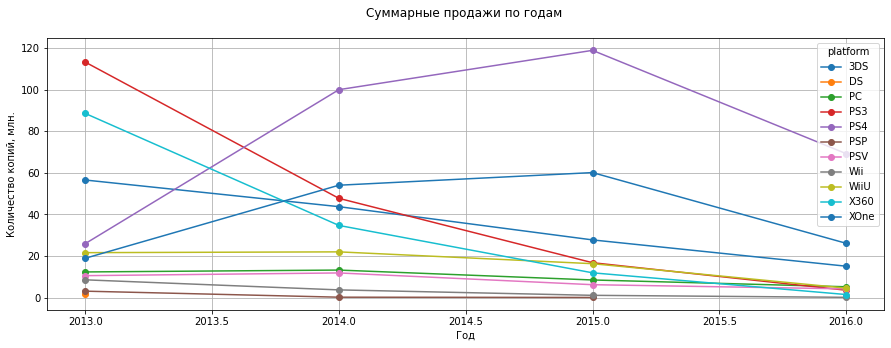

In [28]:
#сформируем датафрейм с актуальным периодом
data_mod = data.query('year_of_release > 2012')
sales_current_period = (data_mod.pivot_table(index='year_of_release', 
                                             columns='platform', 
                                             values='sales_total', 
                                             aggfunc='sum'))

sales_current_period.plot(figsize=(15,5), grid=True, style='o-')

plt.title('Суммарные продажи по годам \n')
plt.xlabel('Год')
plt.ylabel('Количество копий, млн.')

В основном продажи платформ падают, за исключением двух: PS4 и XOne. Низкие цифры в 2016 году не показатель. 2016 год в датафрейме представлен не полностью.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0, 0.5, 'Количество копий, млн.')

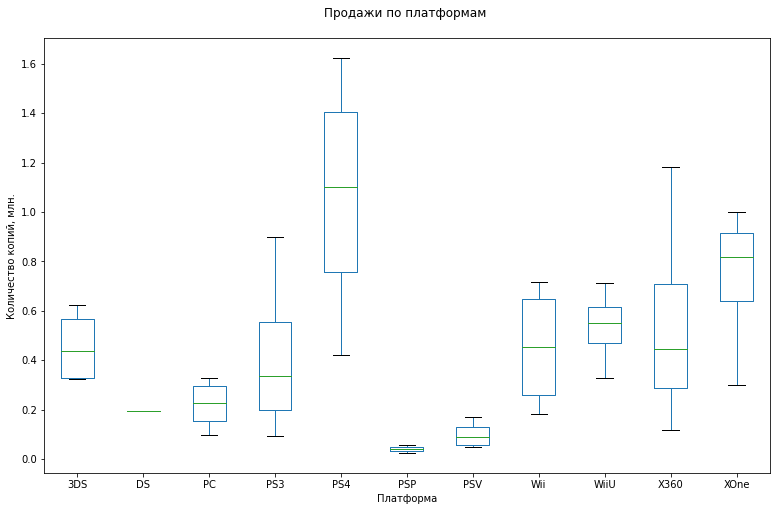

In [29]:
(data_mod.pivot_table(index='year_of_release', 
                      columns='platform', 
                      values='sales_total')
         .plot(kind='box', figsize=(13,8)))
plt.title('Продажи по платформам \n')
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн.')

Самая популярная динамичная платформа это PS4. XOne платформа с потенциалом развития. Так же заслуживают внимания платформы: X360, PS3, 3DS и Wii.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируем выводы.**

Посчитаем корреляцию между отзывами и продажами платформы PS4.

In [31]:
data_corr = data_mod.query('platform == "PS4"')[['sales_total', 'critic_score', 'user_score']]
data_corr.corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Коэффициент корреляции (КК) 41% между оценками критиков и продажами говорит о слабой связи этих значений. Связь между оценками пользователей и продажами отсутствует.

Построим матрицу диаграмм рассеяния.

array([[<AxesSubplot:xlabel='sales_total', ylabel='sales_total'>,
        <AxesSubplot:xlabel='critic_score', ylabel='sales_total'>,
        <AxesSubplot:xlabel='user_score', ylabel='sales_total'>],
       [<AxesSubplot:xlabel='sales_total', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='sales_total', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

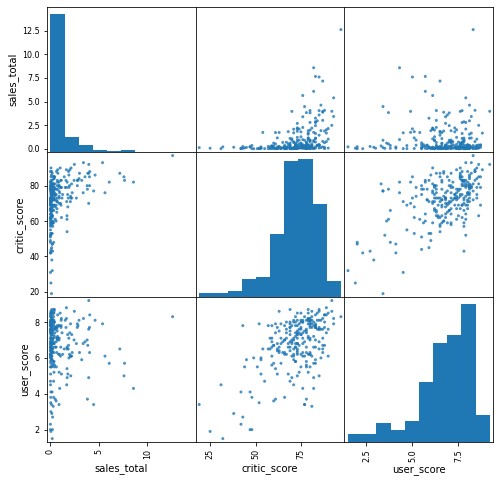

In [32]:
pd.plotting.scatter_matrix(data_corr, figsize=(8, 8), alpha=0.8)

Связи между оценками и продажами слабые. А связь между оценками критиков и пользователей - средняя. КК составляет 56%.

**Соотнесем выводы с продажами игр на других платформах.**

Посчитаем коэффициент корреляции на других платформах из топ 5.

PS3


,sales_total,critic_score,user_score
sales_total,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000



XOne


,sales_total,critic_score,user_score
sales_total,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000



3DS


,sales_total,critic_score,user_score
sales_total,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000



X360


,sales_total,critic_score,user_score
sales_total,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


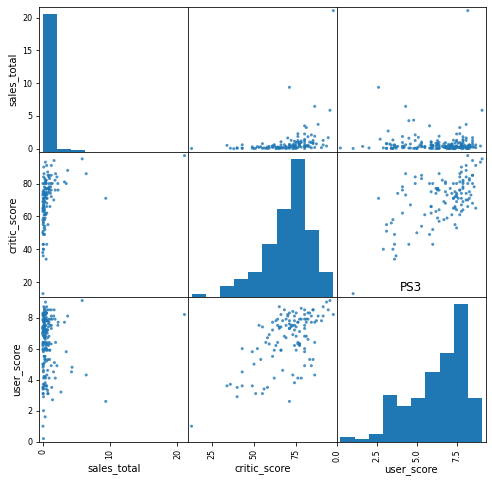

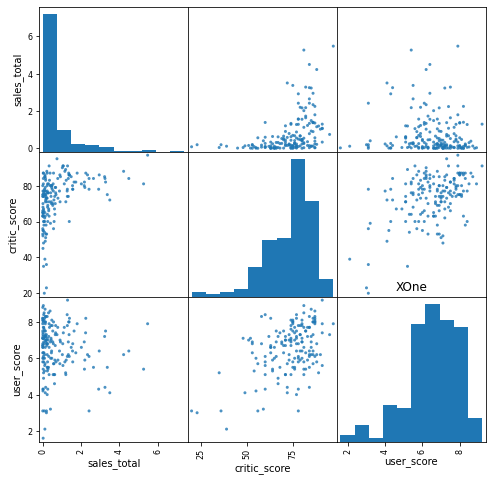

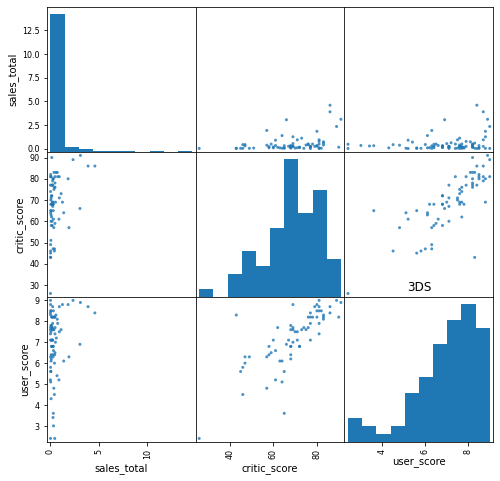

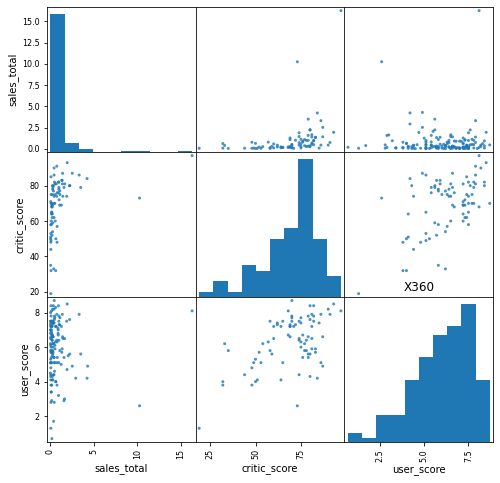

In [33]:
#создадим список популярных платформ
platform_top5 = (data_mod.groupby('platform')['sales_total']
                         .sum()
                         .sort_values(ascending=False)
                         .head(5)
                         .reset_index())
platform_top5_name = platform_top5['platform']

#при помощи цикла выведем таблицу коэффициента корреляции и матрицу диаграмм рассеяния
for i in range (len(platform_top5_name)-1):
    platform_name = platform_top5_name[i+1]
    temp = data_mod.query('platform == @platform_name')[['sales_total', 'critic_score', 'user_score']]
    
    print(platform_name)
    display(temp.corr())
    pd.plotting.scatter_matrix(temp, figsize=(8, 8), alpha=0.8)
    plt.title(platform_name)
    print()

Выводы которые можно сделать из этих данных.

   * Оценки экспертов и пользавателей в основном совпадают. КК от 47% до 77% (3DS).
   * Оценки экспертов оказывают слабое влияние на уровень продаж. КК от 33% до 42% (XOne).
   * Оценки пользователей очень слабо влияют на уровень продаж. КК от 0% до 24% (3DS).

Посмотрим на общее распределение игр по жанрам.

Построим диаграмму размаха.

Text(0, 0.5, 'Количество')

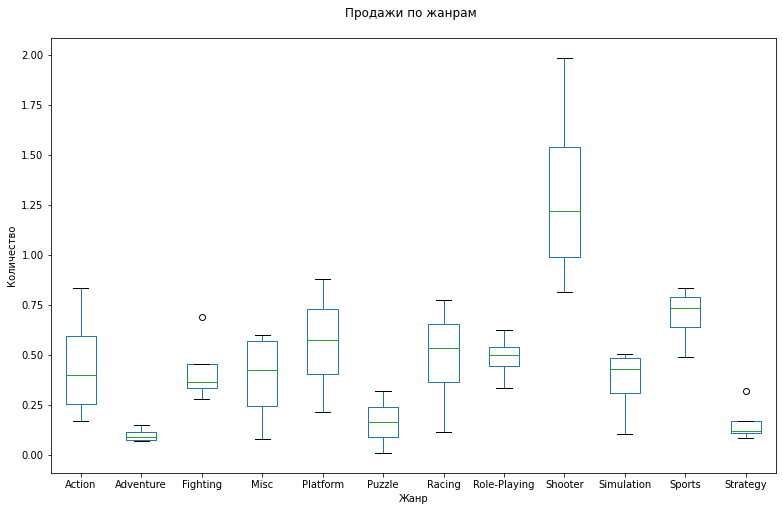

In [34]:
(data_mod.pivot_table(index='year_of_release', 
                      columns='genre', 
                      values='sales_total')
         .plot(kind='box', figsize=(13,8)))
plt.title('Продажи по жанрам \n')
plt.xlabel('Жанр')
plt.ylabel('Количество')

Сумые популярные жанры это Shooter, Sports и Platform.

Сравним самый популярный жанр `Shooter` с наимение популярным `Adventure` посчитав корреляцию.

In [35]:
data_genre_name = ['Shooter', 'Adventure']

for i in data_genre_name:
    genre_name = i
    print(genre_name)
    display(data.query('genre == @genre_name')[['sales_total', 'critic_score', 'user_score']].corr())
    print()

Shooter


,sales_total,critic_score,user_score
sales_total,1.000000,0.355957,-0.033210
critic_score,0.355957,1.000000,0.563374
user_score,-0.033210,0.563374,1.000000



Adventure


,sales_total,critic_score,user_score
sales_total,1.000000,0.247123,0.077603
critic_score,0.247123,1.000000,0.723507
user_score,0.077603,0.723507,1.000000


Видно, что в более популярном жанре оценки экспертов сильнее влияют на уровень продаж.

## Составьте портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**

* Самые популярные платформы (топ-5). Опишим различия в долях продаж.
* Самые популярные жанры (топ-5). Поясним разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Найдем долю популярных платформ для каждого региона.

In [36]:
#создадим таблицу предпочтений в NA
data_platform_na = (data_mod
     .pivot_table(index='platform', values='na_sales', aggfunc='sum')
     .sort_values(by='na_sales', ascending=False))

#отбираем топ 5
data_platform_na_5 = data_platform_na.head(5).copy()
#добавляем новую строчку с продажами по другим платформам
data_platform_na_5.loc['Other']= data_platform_na.sum() - data_platform_na_5.sum()

#создадим таблицу предпочтений в EU
data_platform_eu = (data_mod
     .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
     .sort_values(by='eu_sales', ascending=False))

#отбираем топ 5
data_platform_eu_5 = data_platform_eu.head(5).copy()
#добавляем новую строчку с продажами по другим платформам
data_platform_eu_5.loc['Other' ]= data_platform_eu.sum() - data_platform_eu_5.sum()

#создадим таблицу предпочтений в JP
data_platform_jp = (data_mod
     .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
     .sort_values(by='jp_sales', ascending=False))

#отбираем топ 5
data_platform_jp_5 = data_platform_jp.head(5).copy()
#добавляем новую строчку с продажами по другим платформам
data_platform_jp_5.loc['Other' ]= data_platform_jp.sum() - data_platform_jp_5.sum()

#объединим полученные таблицы в одну
data_platform_all_5 = data_platform_na_5.join([data_platform_eu_5, data_platform_jp_5], how='outer')

Нарисуем график и сравним доли продаж.

Text(0.5, 1.0, 'Доли продаж популярных платформ в регионах')

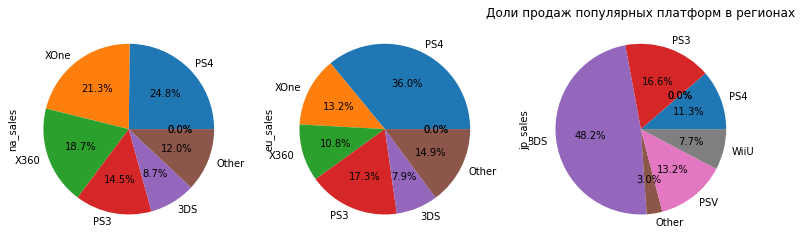

In [37]:
data_platform_all_5.plot(kind='pie', figsize=(13,8), subplots=True, legend='', autopct='%1.1f%%')
plt.title('Доли продаж популярных платформ в регионах')

В Америке и Европе предпочтения по платформам похожи. С той лишь разницей, что в Европе, более популярна PS4 (на 11%). В Японии мы видем совсем другую картину. С большим отрывом лидирует платформа 3DS (48%) и присутствуют платформы которых нет на американском и европейском рынках. Это PSV и WiiU.  

Найдем самые популярные жанры в регионах.

In [38]:
#создадим таблицу предпочтений в NA
data_genre_na = (data_mod
     .pivot_table(index='genre', values='na_sales', aggfunc='sum')
     .sort_values(by='na_sales', ascending=False))
data_genre_na_5 = data_genre_na.head(5).copy()
#добавляем новую строчку с продажами по другим жанрам
data_genre_na_5.loc['Other']= data_genre_na.sum() - data_genre_na_5.sum()

#создадим таблицу предпочтений в EU
data_genre_eu = (data_mod
     .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
     .sort_values(by='eu_sales', ascending=False))
data_genre_eu_5 = data_genre_eu.head(5).copy()
#добавляем новую строчку с продажами по другим жанрам
data_genre_eu_5.loc['Other']= data_genre_eu.sum() - data_genre_eu_5.sum()

#создадим таблицу предпочтений в JP
data_genre_jp = (data_mod
     .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
     .sort_values(by='jp_sales', ascending=False))
data_genre_jp_5 = data_genre_jp.head(5).copy()
#добавляем новую строчку с продажами по другим жанрам
data_genre_jp_5.loc['Other']= data_genre_jp.sum() - data_genre_jp_5.sum()

#объединим полученные таблицы в одну
data_genre_all_5 = data_genre_na_5.join([data_genre_eu_5, data_genre_jp_5], how='outer')

Простроим график популярных жанров по регионам.

Text(0.5, 1.0, 'Доли продаж популярных жанров в регионах')

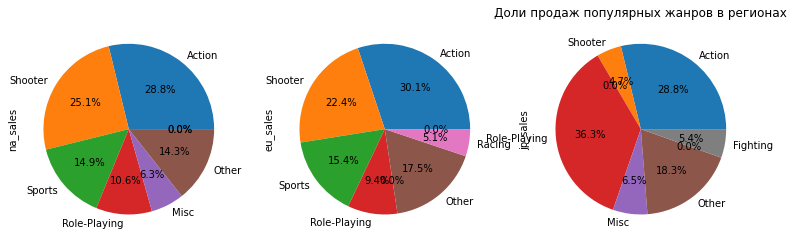

In [39]:
data_genre_all_5.plot(kind='pie', figsize=(13,8), subplots=True, legend='', autopct='%1.1f%%')
plt.title('Доли продаж популярных жанров в регионах')

Предпочтения по жанрам в Америке и Европе очень похожи с одним отличием. В Америке на 5 месте жанр Misc, а в Европе Racing. В Японии на первом месте Role-Playing (в 3,5 раза популярнее чем в Америке и Европе), а Shooter, наоборот, менее популярен (почти в 5 раз). В Японии есть жанр который не представлен у других, это Fighting. Процент продаж жанра Action во всех регионах примерно равен - 29-30% от всех продаж.

Узнаем, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [40]:
#создадим таблицу рейтинга в NA
data_rating_na = (data_mod
     .pivot_table(index='rating', values='na_sales', aggfunc='sum')
     .sort_values(by='na_sales', ascending=False))

#создадим таблицу рейтинга в EU
data_rating_eu = (data_mod
     .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
     .sort_values(by='eu_sales', ascending=False))
     

#создадим таблицу рейтинга в JP
data_rating_jp = (data_mod
     .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
     .sort_values(by='jp_sales', ascending=False))
     

#объединим полученные таблицы в одну
data_rating_all = data_rating_na.join([data_rating_eu, data_rating_jp], how='outer')

Построим график влияния рейтинга ESRB на продажи в регионах.

Text(0.5, 1.0, 'Доли продаж по рейтингу ESRB в регионах')

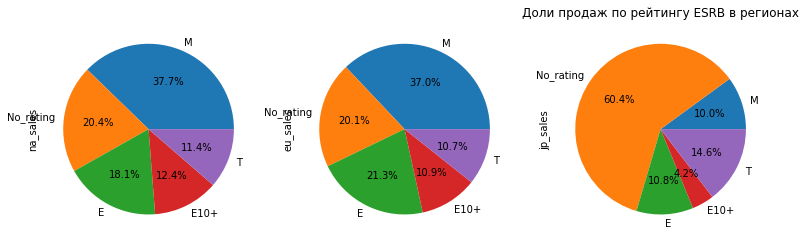

In [41]:
data_rating_all.plot(kind='pie', figsize=(13,8), subplots=True, legend='', autopct='%1.1f%%')
plt.title('Доли продаж по рейтингу ESRB в регионах')

Соотношение продаж в зависимости от рейтинга ESRB в Америке и Европе примерно одинаковое. Самые продаваемые игры с рейтингом М (от 17 лет) - 37%. Доля игр без рейтинга составляет 20%. В Японии же совсем другая картина. Доля игр без рейтинга составляет 60%.

In [42]:
# Комментарий ревьюера
temp = data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


No_rating    6676
E            3924
T            2905
M            1536
E10+         1393
Name: rating, dtype: int64

## Проверим гипотезы

* **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Выдвинем гипотезы.
* Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Альтернативная - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [43]:
#Сформируем сравниваемые массивы
data_x_one = data_mod.query('platform == "XOne"')['user_score'].dropna()
data_pc = data_mod.query('platform == "PC"')['user_score'].dropna()

#назначим alpha
alpha = 0.01

#посчитаем
results = st.ttest_ind(data_x_one, data_pc, equal_var=False)
print('p - значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p - значение 0.14759702913383088
Не получилось отвергнуть нулевую гипотезу


In [44]:
print('Среднее пользовательского рейтинга платформы Xone =', data_x_one.mean())
print('Среднее пользовательского рейтинга платформы PC  = ', data_pc.mean())

Среднее пользовательского рейтинга платформы Xone = 6.521428
Среднее пользовательского рейтинга платформы PC  =  6.2696776


Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - верна.

* **Средние пользовательские рейтинги жанров Action и Sports разные.**

Выдвинем гипотезы.
* Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* Альтернативная - Средние пользовательские рейтинги жанров Action и Sports разные.

In [45]:
#Сформируем сравниваемые массивы
data_action = data_mod.query('genre == "Action"')['user_score'].dropna()
data_sports = data_mod.query('genre == "Sports"')['user_score'].dropna()

#назначим alpha
alpha = 0.01

#посчитаем
results = st.ttest_ind(data_action, data_sports, equal_var=False)
print('p - значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p - значение 1.445999656754529e-20
Отвергаем нулевую гипотезу


In [46]:
print('Среднее пользовательского рейтинга жанра Action =', data_action.mean())
print('Среднее пользовательского рейтинга жанра Sports =', data_sports.mean())

Среднее пользовательского рейтинга жанра Action = 6.837532
Среднее пользовательского рейтинга жанра Sports = 5.238125


Гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные - верна.

## Напишим общий вывод

В начале проекта мы загрузили данные и заменили названия столбцов приведя их к нижнему регистру. Удалили пустые значения, преобразовали в нужные типы данных и обработали пропуски.

Провели исследовательский анализ данных. Выясняли , что наибольшие продажи по всем компьютерным играм были 2005 - 2011 годы. 

Выбрали 10 платформ с наибольшими суммарными продажами и построили график распределение по годам. Выясннили, что все платформы переживают взлеты и падения суммарных продаж. Срок жизни платформ примерно 10 лет. Продажи у всех популярных ранее платформ сейчас падают. Платформы у которых растут суммарные продажи это PS4 и XOne.

Построили график "ящик с усами" по глобальным продажам игр в разбивке по платформам за актуальный период (последние 5 лет) . Выяснили что наиболее перспективные платформы для продажи это : PS4, XOne, X360, PS3 и 3DS.

Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Посчитали корреляцию между отзывами и продажами платформы PS4. 
Пришли к выводу, что самый высокий коэффициент корреляции (КК) 56% между оценками критиков и оценками пользователей. Их вкусы в большинстве случаев совпадают. КК 41% между оценками критиками и продажами говорит о том, что потребители при покупке присматриваются к этим оценкам. КК между оценками пользователей и продажами в 3% говорит о том, что оценки пользователей оказывают очень слабое влияние на уровень продаж.

Посчитали коэффициент корреляции на других, топ 5, платформах и пришли к выводу. 
   * Оценки экспертов и пользавателей в основном совпадают. КК от 47% до 77% (3DS).
   * Оценки экспертов оказывают слабое влияние на уровень продаж. КК от 33% до 42% (XOne).
   * Оценки пользователей очень слабо влияют на уровень продаж. КК от 0% до 24% (3DS).

Посмотрим на общее распределение игр по жанрам построив диаграмму размаха.
Сумые популярные жанры это Shooter, Sports и Platform.

Сравнили самый популярный жанр Shooter с наимение популярным Adventure посчитав корреляцию. Выяснили, что в более популярном жанре оценки экспертов сильнее влияют на уровень продаж.

Составили портрет пользователя каждого региона.
   * В Америке и Европе предпочтения по платформам похожи. С той лишь разницей, что в Европе, более популярна PS4 (на 11%). В Японии мы видем совсем другую картину. С большим отрывом лидирует платформа 3DS (48%) и присутствуют платформы которых нет на американском и европейском рынках. Это PSV и WiiU.
   * Предпочтения по жанрам в Америке и Европе очень похожи с одним отличием. В Америке на 5 месте жанр Misc, а в Европе Racing. В Японии на первом месте Role-Playing (в 3,5 раза популярнее чем в Америке и Европе), а Shooter, наоборот, менее популярен (почти в 5 раз). В Японии есть жанр который не представлен у других, это Fighting. Процент продаж жанра Action во всех регионах примерно равен - 29-30% от всех продаж.
   * Соотношение продаж в зависимости от рейтинга ESRB в Америке и Европе примерно одинаковое. Самые продаваемые игры с рейтингом М (от 17 лет) - 37%. Доля игр без рейтинга составляет 20%. В Японии же совсем другая картина. Доля игр без рейтинга составляет 60%.
    
Выдвинули и проверили гипотезы. Оказалось: 
   * средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
   * средние пользовательские рейтинги жанров Action и Sports разные.

По итогу работы пришли к следующему выводу.
   При определении потенциально популярного продукта и планирования рекламных кампаний в Европе и в  Северной Америке надо исходить их следующих выявленных закономерностей.
>Наиболее перспективные платформы для продажи это : PS4, XOne, X360, PS3 и 3DS. Платформы набирающие популярность к 2017 году будут PS4 и XOne. Сумые популярные жанры это Action, Shooter, Sports и Role-Playing. Наиболее продаваемые игры с рейтингом ESRB это игры с рейтингом -  M, Е и игры без рейтинга.